In [12]:
#importing libraries
import numpy as np
import logomaker
import algo as algo
import matplotlib.pyplot as plt
import time



In [13]:
def drawLogo(motifs,title):
    # create a matrix of the motif
    counts_matrix = logomaker.alignment_to_matrix(motifs)

    # Convert counts to probabilities
    print(counts_matrix)
    # prob_matrix = counts_matrix / counts_matrix.sum(axis=1)
    row_sums = counts_matrix.sum(axis=1)
    print(row_sums)
    prob_matrix = counts_matrix / row_sums[0]
    print(prob_matrix)

    # Create a logo object
    logo = logomaker.Logo(prob_matrix, color_scheme='classic')

    # Customize the appearance (optional)
    logo.ax.set_title(title)
    logo.style_spines(visible=False)  # Hide spines
    # logo.style_xticks(fmt='%d', anchor = 0,spacing=50)  # Adjust x-axis ticks
    logo.ax.set_ylabel("Probability")

    # Show the logo
    logo.draw()
    print(prob_matrix)

def drawGraph(x1,y1,x2,y2,color,label,Y_axis) :
    plt.plot(x1, y1, color='blue', label=label[0])
    plt.plot(x2, y2, color='red', label=label[1])
    # Adding labels and title
    plt.xlabel('K-mer value K')
    plt.ylabel(Y_axis)
    # Adding legend
    plt.legend()

    # Displaying the plot
    plt.show()

In [14]:
def printMatrix(motifs):
    print("Matrix of the motifs")
    for i in range(len(motifs)):
        print(motifs[i])
    k = len(motifs[0])
    print("Avg Entropy of the motifs: ", algo.Entropy(motifs)/k)
    print("Avg Gain of the motifs: ", algo.gain(algo.Entropy(motifs),algo.getHighestEntropy(len(motifs))*k,k))
    print("Score of the motifs: ", algo.Score(motifs))
    print("\n")

In [15]:
# simulation with information gain
def main():
    input = ['data/hm03.txt','data/yst04r.txt','data/yst08r.txt']
    for inp in input:
        print(" for Input file: ", inp)
        dna = []
        # read the input file
        with open(inp, 'r') as f:
            dna = f.read().splitlines()
        bestMotifs = []
        bestMotifs2 = []
        highestEntropy = algo.getHighestEntropy(len(dna))
        print("Highest Entropy: ", highestEntropy)
        gainInfo1 = 0
        gainInfo2 = 0

        x_values = []
        y_entropy1 = []
        y_entropy2 = []

        y_gain1 = []
        y_gain2 = []
        runnigTime1 = []
        runnigTime2 = []


        for i in range(8,25):
            print("K is : ", i)
            
            startTime = time.time()

            motifs = algo.multipleSeedSearch(dna, 50, i, 1000,algo.gibbsSampler)

            endTime = time.time()
            runnigTime1.append((endTime - startTime))

            print("Gibbs Sampler")
            print("Elasped time: ", (endTime - startTime), " seconds")
            printMatrix(motifs)
            entropy1 = algo.Entropy(motifs)
            x_values.append(i)
            y_entropy1.append(entropy1/i)
            y_gain1.append(algo.gain(entropy1,highestEntropy*i,i))
            if len(bestMotifs) == 0 or algo.gain(entropy1,highestEntropy*i, i) > gainInfo1 :
                bestMotifs = motifs
                gainInfo1 = algo.gain(entropy1,highestEntropy*i,i)
                # print('here')
            drawLogo(motifs,"Gibbs Sampler")

            # for randomized motif search

            startTime = time.time()

            motifs = algo.multipleSeedSearch(dna, 50, i, 1000,algo.RandomizedMotifSearch)

            endTime = time.time()
            runnigTime2.append((endTime - startTime))
            print("Randomized Motif Search")
            print("Elasped time: ", (endTime - startTime), " seconds")
            printMatrix(motifs)
            entropy2 = algo.Entropy(motifs)
            y_entropy2.append(entropy2/i)
            y_gain2.append(algo.gain(entropy2,highestEntropy*i,i))
            if len(bestMotifs2) == 0 or algo.gain(entropy2,highestEntropy*i,i) > gainInfo2 :
                bestMotifs2 = motifs
                gainInfo2 = algo.gain(entropy2,highestEntropy*i,i)
                # print('here2')
            drawLogo(motifs,"Randomized Motif Search")
        

        drawGraph(x_values,y_entropy1,x_values,y_entropy2,'blue',['Gibbs Sampler','Randomized Motif Search'],'Entropy')
        drawGraph(x_values,y_gain1,x_values,y_gain2,'red',['Gibbs Sampler','Randomized Motif Search'],'Gain')
        drawGraph(x_values,runnigTime1,x_values,runnigTime2,'green',['Gibbs Sampler','Randomized Motif Search'],'Running Time')


        print("Best Motifs1:")
        printMatrix(bestMotifs)
        drawLogo(bestMotifs,"Gibbs Sampler")

        print("Best Motifs2:")
        printMatrix(bestMotifs2)
        drawLogo(bestMotifs2,"Randomized Motif Search")
        

 for Input file:  data/hm03.txt
Highest Entropy:  1.9709505944546686
K is :  8
Gibbs Sampler
Elasped time:  60.75888252258301  seconds
Matrix of the motifs
AAAATAAA
AAAATAAA
AAAATAAA
AAAAAAAA
AAAAGCAA
AAAATAAA
AAAATCAA
AAAATAAA
AAAATAAA
AAAATCAA
Avg Entropy of the motifs:  1.1926066020304396
Avg Gain of the motifs:  0.778343992424229
Score of the motifs:  5


      A  C  G  T
pos             
0    10  0  0  0
1    10  0  0  0
2    10  0  0  0
3    10  0  0  0
4     1  0  1  8
5     7  3  0  0
6    10  0  0  0
7    10  0  0  0
pos
0    10
1    10
2    10
3    10
4    10
5    10
6    10
7    10
dtype: int64
       A    C    G    T
pos                    
0    1.0  0.0  0.0  0.0
1    1.0  0.0  0.0  0.0
2    1.0  0.0  0.0  0.0
3    1.0  0.0  0.0  0.0
4    0.1  0.0  0.1  0.8
5    0.7  0.3  0.0  0.0
6    1.0  0.0  0.0  0.0
7    1.0  0.0  0.0  0.0
       A    C    G    T
pos                    
0    1.0  0.0  0.0  0.0
1    1.0  0.0  0.0  0.0
2    1.0  0.0  0.0  0.0
3    1.0  0.0  0.0  0.0
4  

/home/toriqe/.local/lib/python3.10/site-packages/logomaker/src/Logo.py:194: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=self.figsize)


       A    C    G    T
pos                    
0    1.0  0.0  0.0  0.0
1    0.5  0.1  0.4  0.0
2    0.5  0.4  0.1  0.0
3    1.0  0.0  0.0  0.0
4    0.6  0.1  0.2  0.1
5    0.9  0.0  0.1  0.0
6    0.3  0.4  0.3  0.0
7    0.8  0.2  0.0  0.0
8    0.9  0.1  0.0  0.0
9    1.0  0.0  0.0  0.0
10   0.8  0.0  0.2  0.0
11   0.1  0.0  0.4  0.5
12   0.7  0.1  0.2  0.0
13   1.0  0.0  0.0  0.0
14   0.9  0.0  0.1  0.0
15   0.1  0.3  0.1  0.5
16   1.0  0.0  0.0  0.0
17   0.6  0.2  0.0  0.2
Randomized Motif Search
Elasped time:  4.076270341873169  seconds
Matrix of the motifs
AAGCAAAAAAAATAAATA
AAGCAAACAAAATAAATA
GAGCAAACAAAATAAATA
AAGCAACATAAAAGAACA
AATGACAATATCTGAATA
GAAAACACAAAAAGAATA
GAGAAGACACAATAAACA
AAACAAAGCAAAGCAACA
GAAAAAAAAAAAAAAAGA
CACAAAAACAAGTGAACA
Avg Entropy of the motifs:  1.4615994034143678
Avg Gain of the motifs:  0.5093511910403008
Score of the motifs:  46


      A  C  G  T
pos             
0     5  1  4  0
1    10  0  0  0
2     3  1  5  1
3     4  5  1  0
4    10  0  0  0
5     

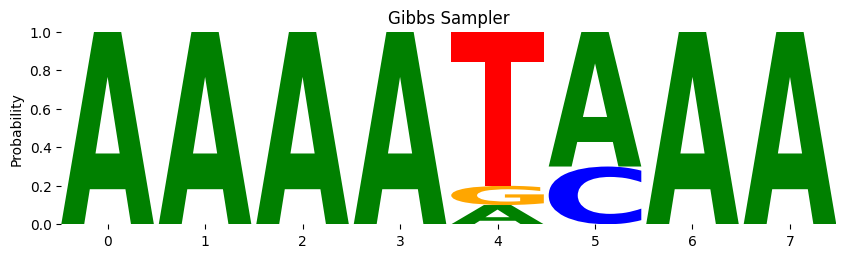

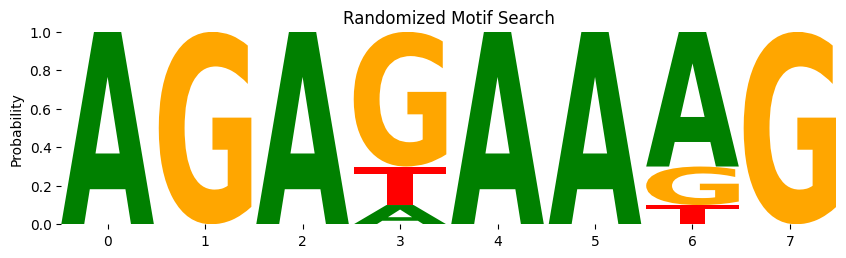

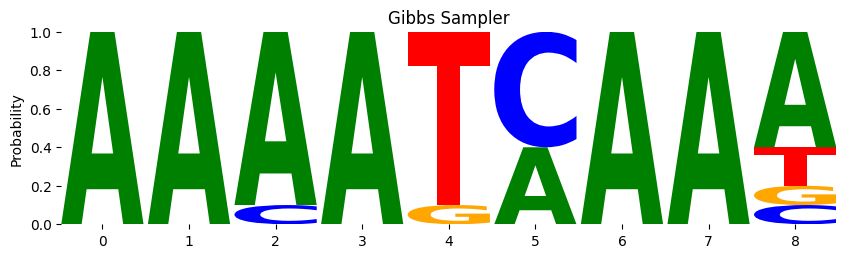

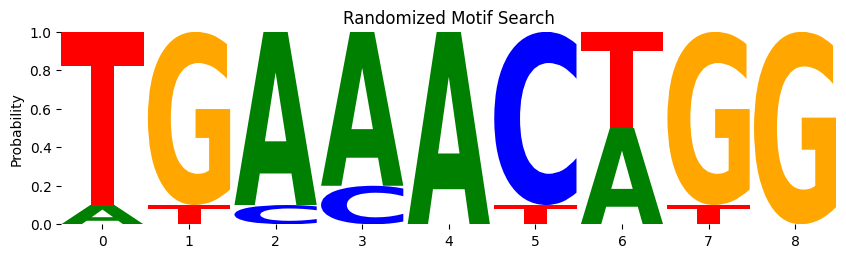

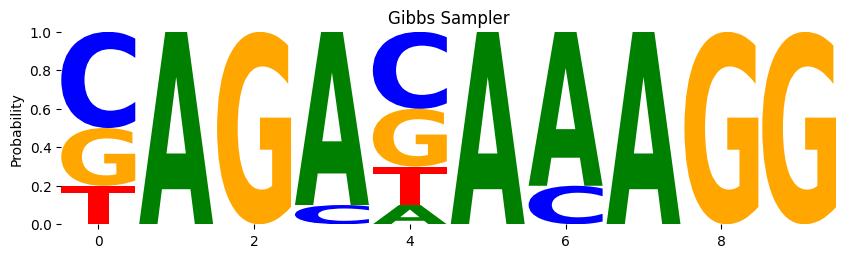

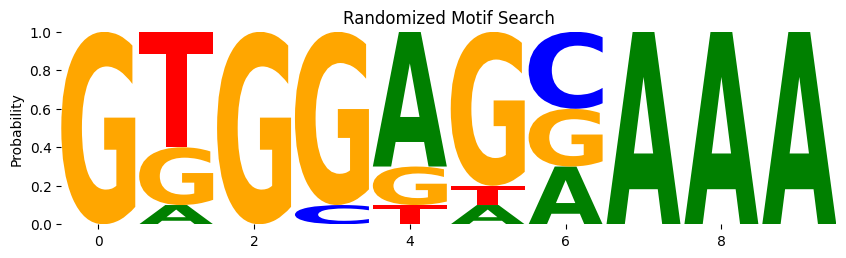

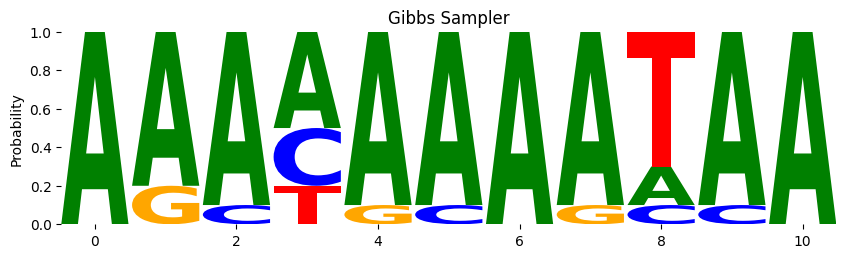

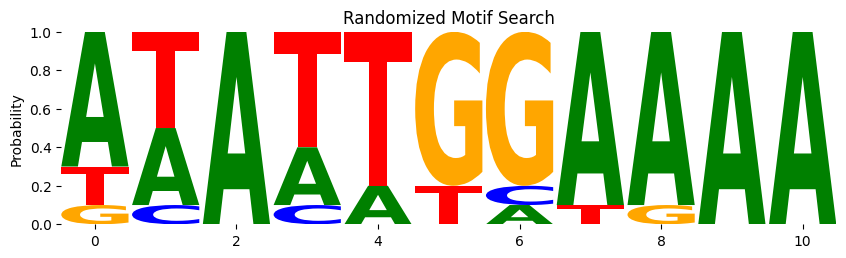

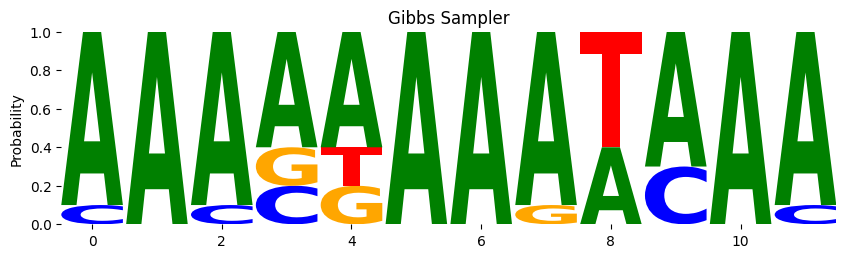

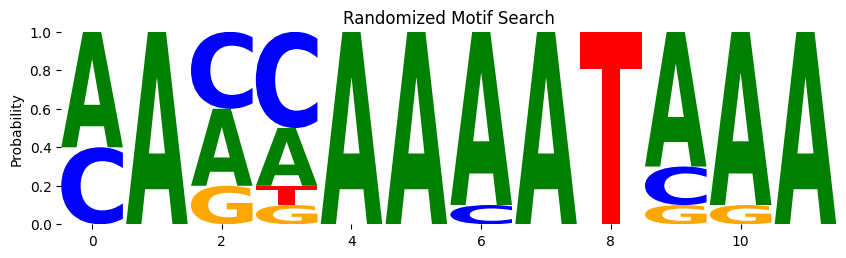

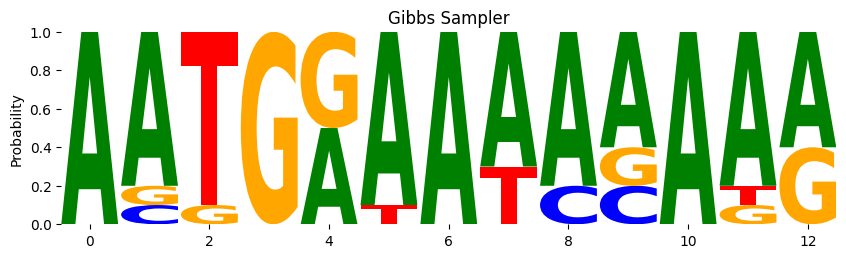

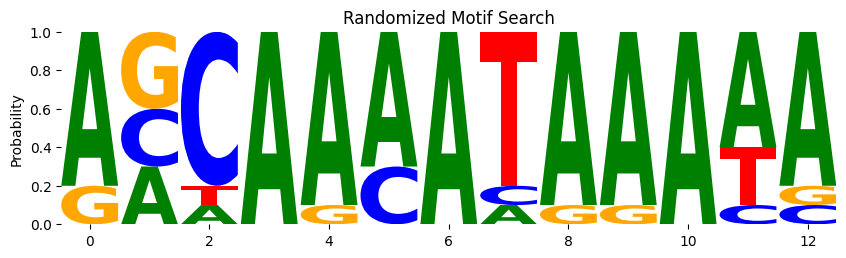

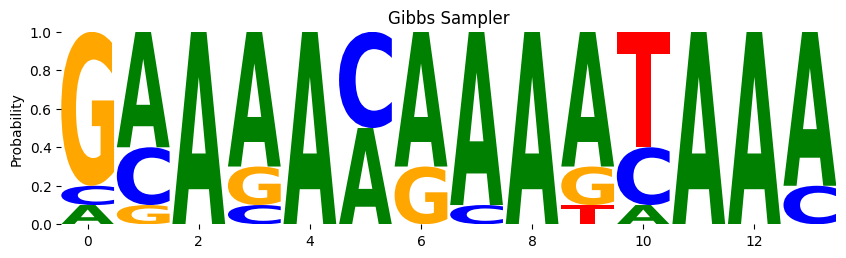

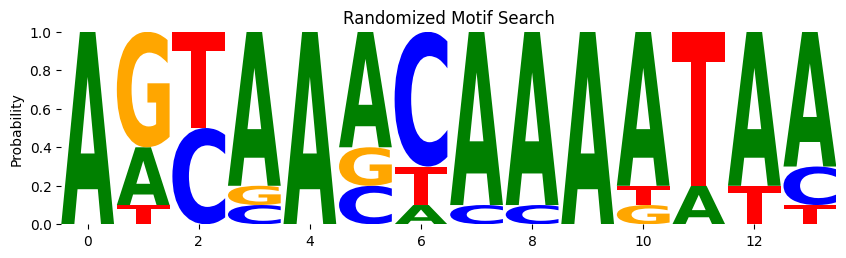

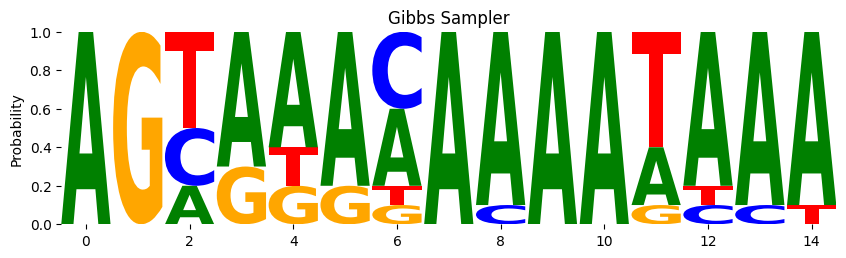

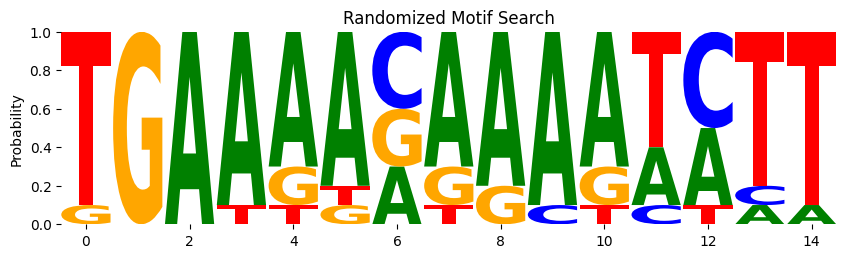

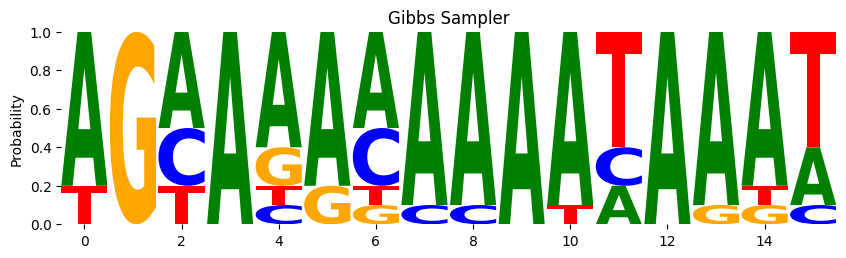

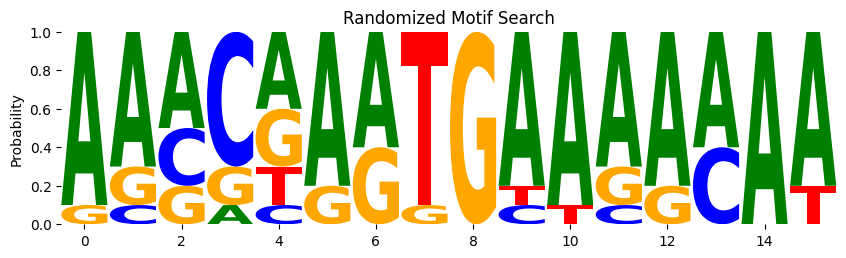

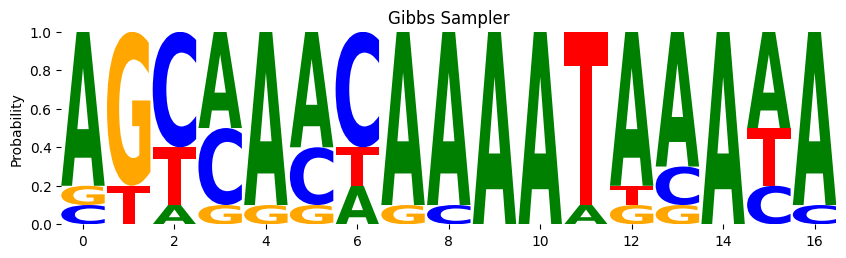

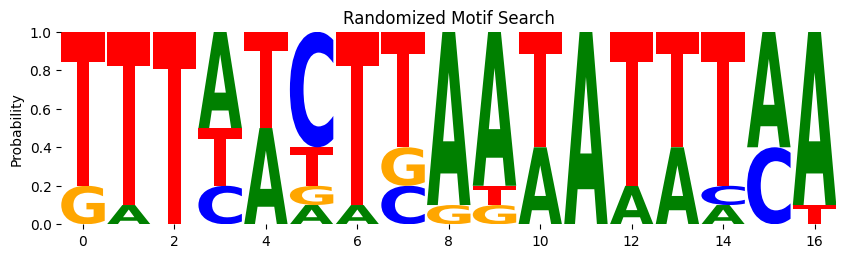

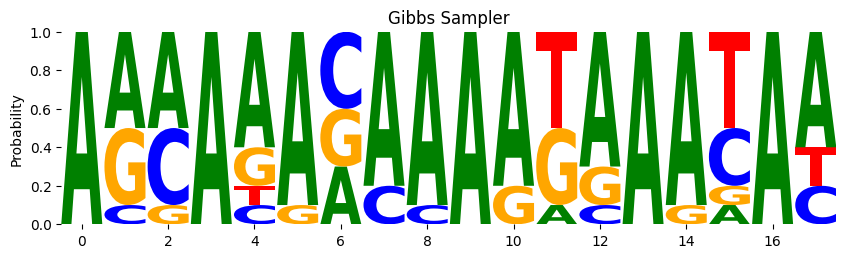

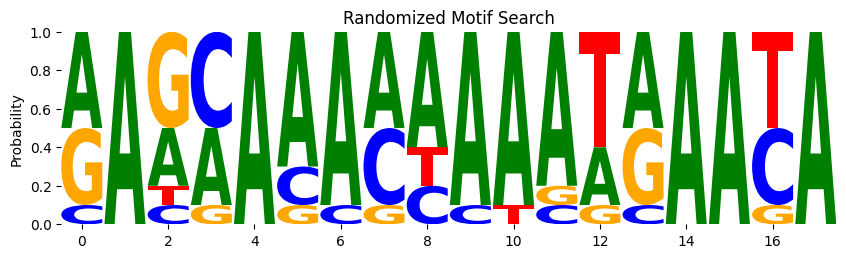

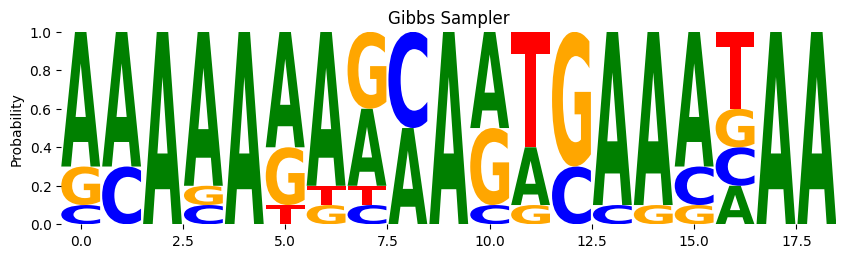

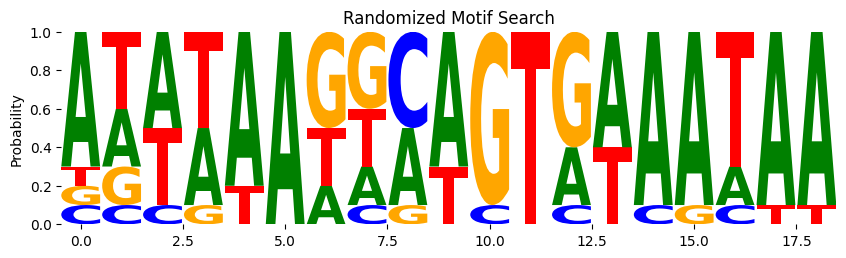

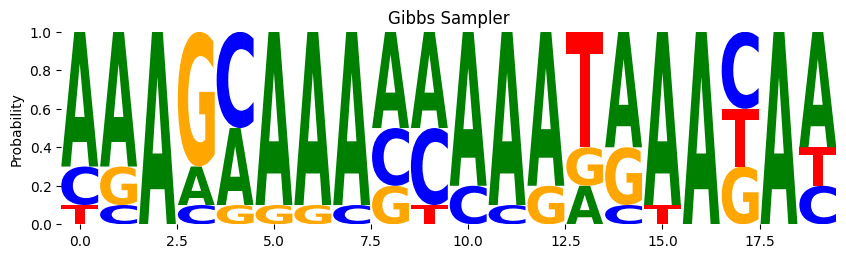

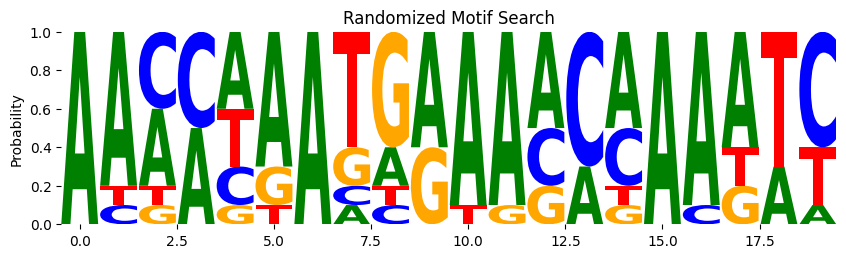

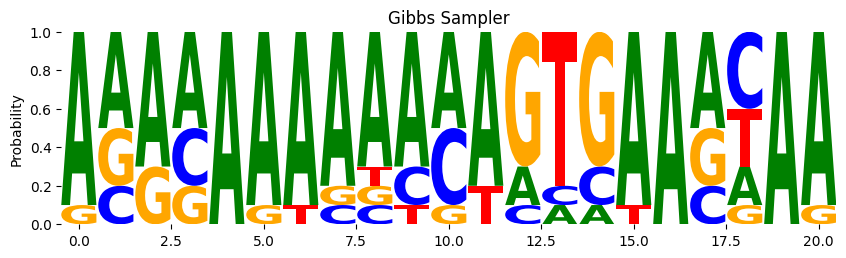

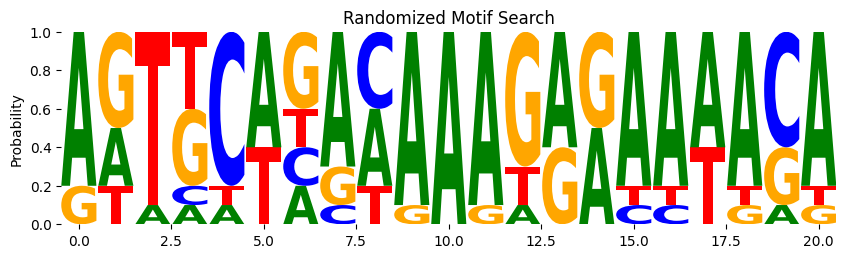

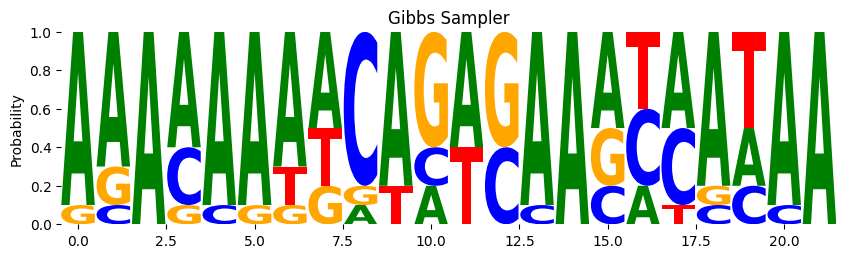

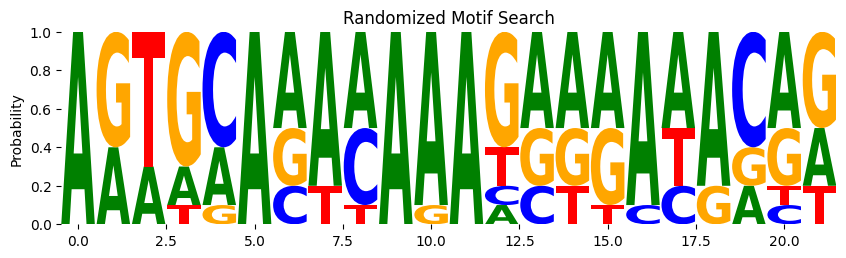

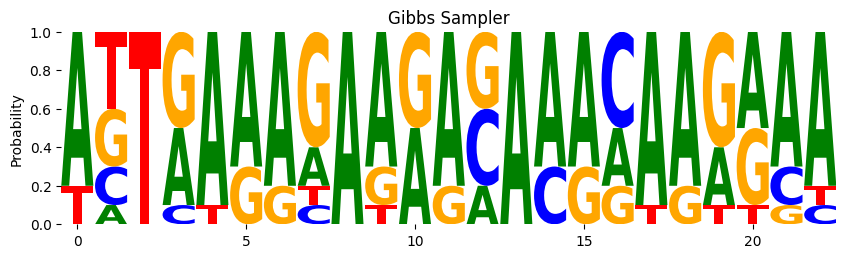

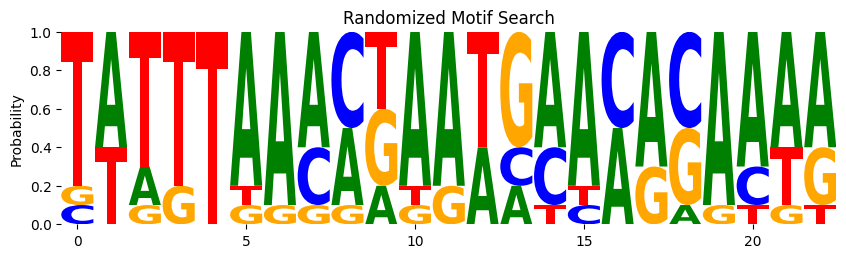

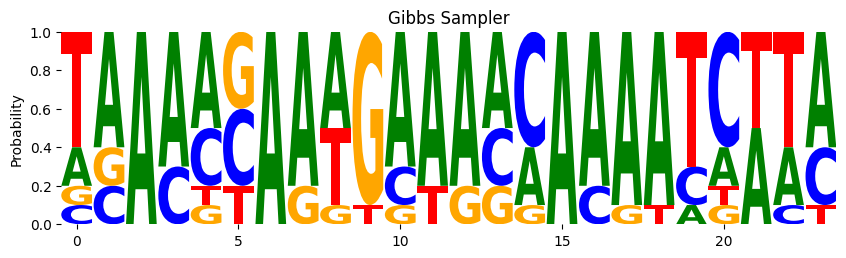

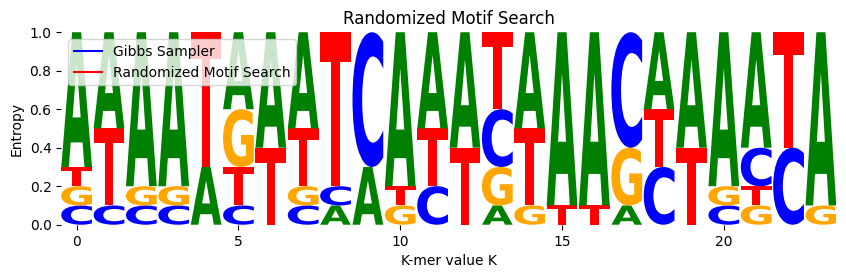

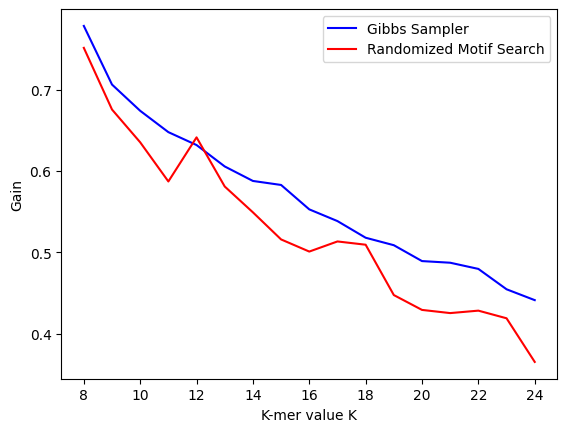

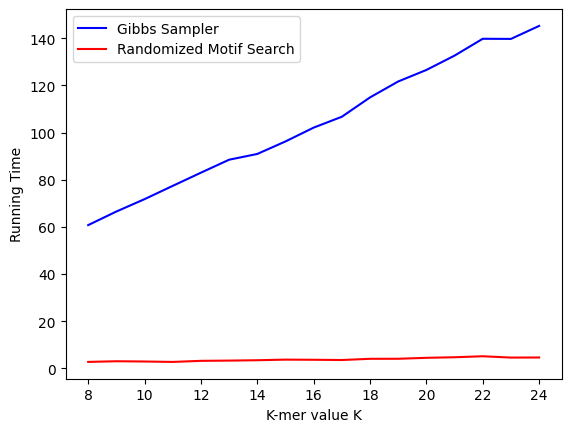

Best Motifs1:
Matrix of the motifs
AAAATAAA
AAAATAAA
AAAATAAA
AAAAAAAA
AAAAGCAA
AAAATAAA
AAAATCAA
AAAATAAA
AAAATAAA
AAAATCAA
Avg Entropy of the motifs:  1.1926066020304396
Avg Gain of the motifs:  0.778343992424229
Score of the motifs:  5


      A  C  G  T
pos             
0    10  0  0  0
1    10  0  0  0
2    10  0  0  0
3    10  0  0  0
4     1  0  1  8
5     7  3  0  0
6    10  0  0  0
7    10  0  0  0
pos
0    10
1    10
2    10
3    10
4    10
5    10
6    10
7    10
dtype: int64
       A    C    G    T
pos                    
0    1.0  0.0  0.0  0.0
1    1.0  0.0  0.0  0.0
2    1.0  0.0  0.0  0.0
3    1.0  0.0  0.0  0.0
4    0.1  0.0  0.1  0.8
5    0.7  0.3  0.0  0.0
6    1.0  0.0  0.0  0.0
7    1.0  0.0  0.0  0.0
       A    C    G    T
pos                    
0    1.0  0.0  0.0  0.0
1    1.0  0.0  0.0  0.0
2    1.0  0.0  0.0  0.0
3    1.0  0.0  0.0  0.0
4    0.1  0.0  0.1  0.8
5    0.7  0.3  0.0  0.0
6    1.0  0.0  0.0  0.0
7    1.0  0.0  0.0  0.0
Best Motifs2:
Matrix of the 

/home/toriqe/.local/lib/python3.10/site-packages/logomaker/src/Logo.py:194: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=self.figsize)


Randomized Motif Search
Elasped time:  1.6970188617706299  seconds
Matrix of the motifs
TTAATTTTTTTTTCTTT
ATATTTTTCTTTTTAAT
TTATTTTTATATTTAGA
TTATTAATCTTTTGTTT
TTATTTTACTTCTTTCT
TTATTTTTATTTTATTT
TTATTTTTTTTTTGTTA
Avg Entropy of the motifs:  1.513099965296492
Avg Gain of the motifs:  0.43711209961825487
Score of the motifs:  22


     A  C  G  T
pos            
0    1  0  0  6
1    0  0  0  7
2    7  0  0  0
3    1  0  0  6
4    0  0  0  7
5    1  0  0  6
6    1  0  0  6
7    1  0  0  6
8    2  3  0  2
9    0  0  0  7
10   1  0  0  6
11   0  1  0  6
12   0  0  0  7
13   1  1  2  3
14   2  0  0  5
15   1  1  1  4
16   2  0  0  5
pos
0     7
1     7
2     7
3     7
4     7
5     7
6     7
7     7
8     7
9     7
10    7
11    7
12    7
13    7
14    7
15    7
16    7
dtype: int64
            A         C         G         T
pos                                        
0    0.142857  0.000000  0.000000  0.857143
1    0.000000  0.000000  0.000000  1.000000
2    1.000000  0.000000  0.000000  

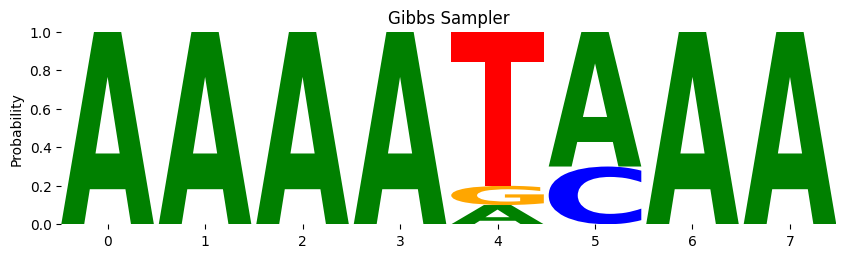

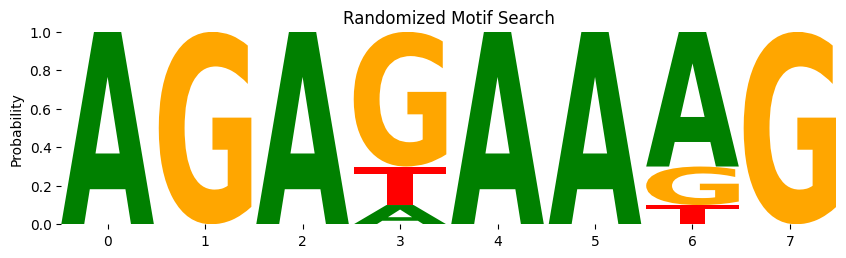

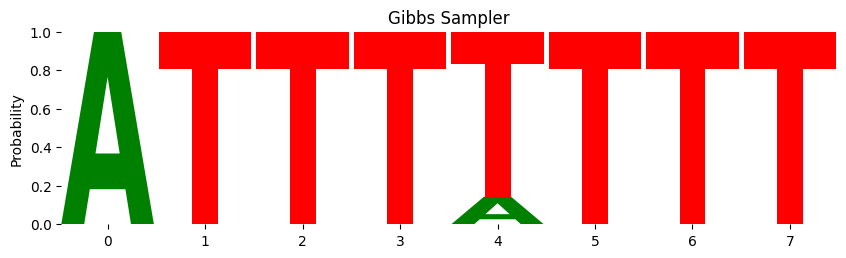

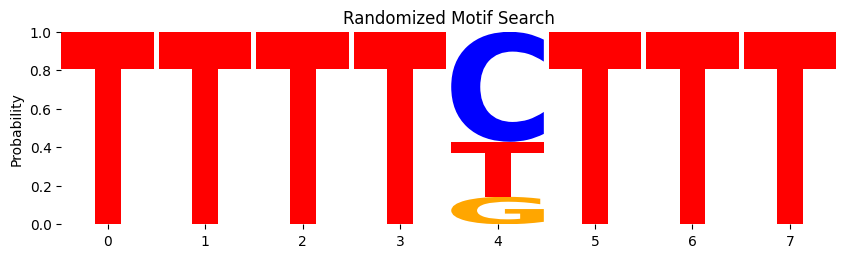

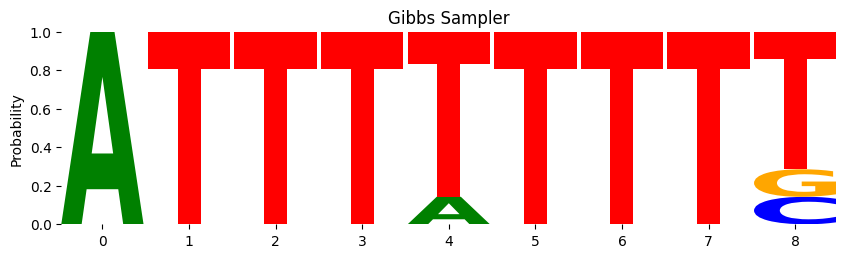

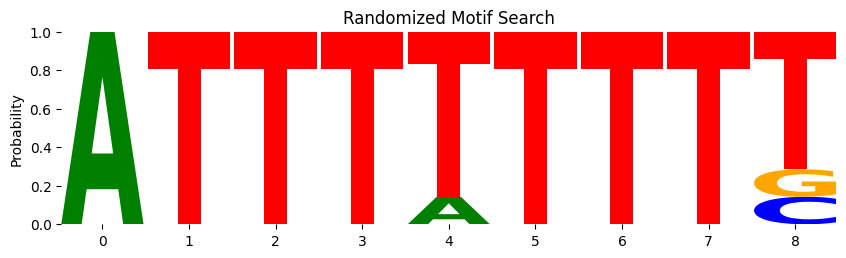

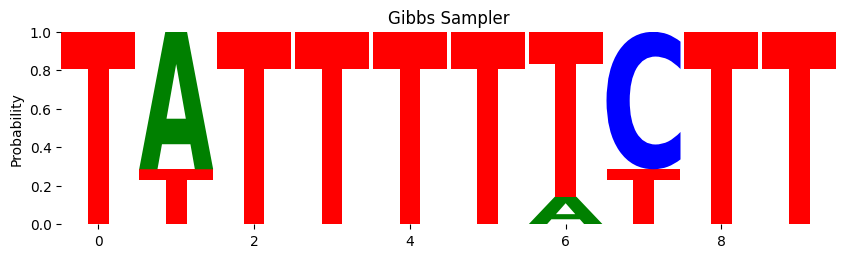

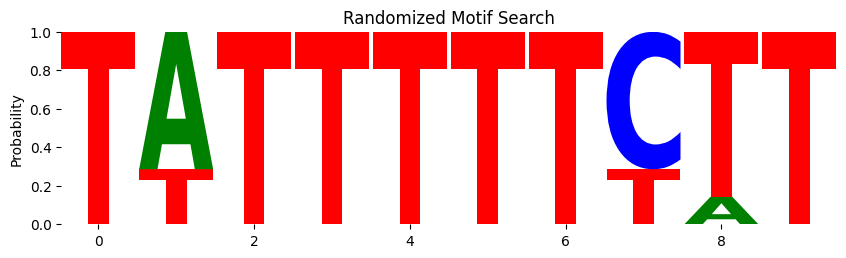

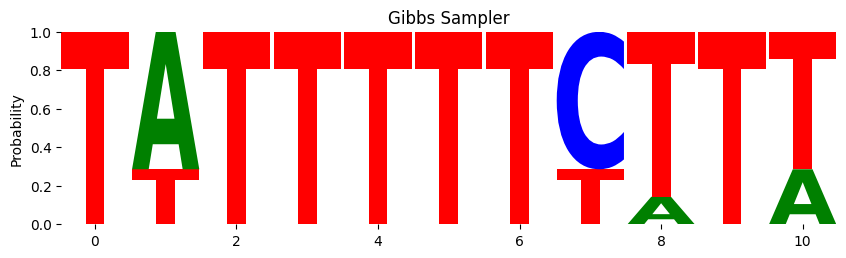

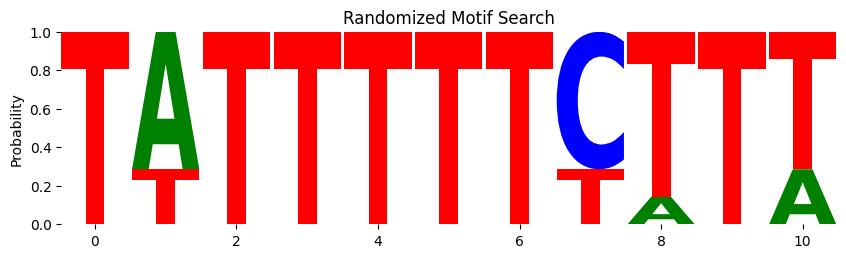

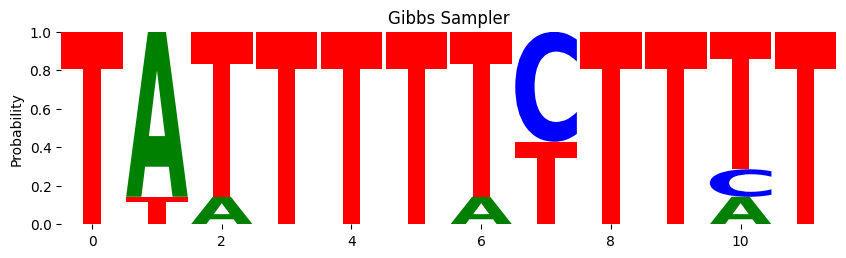

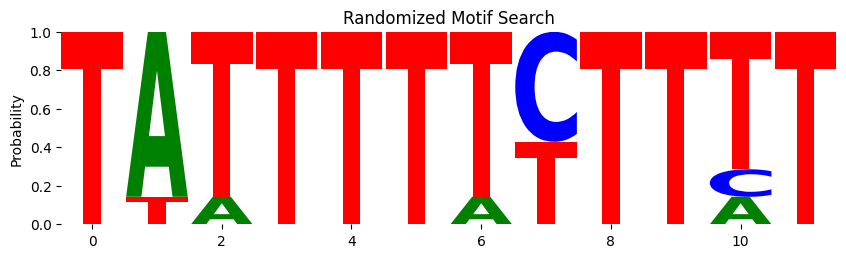

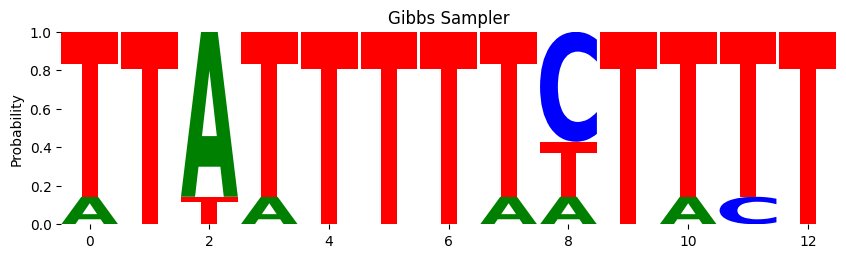

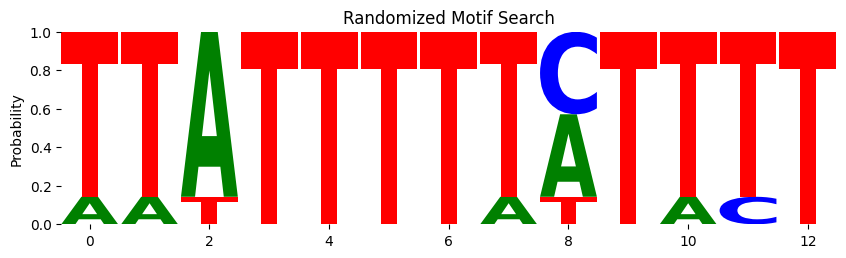

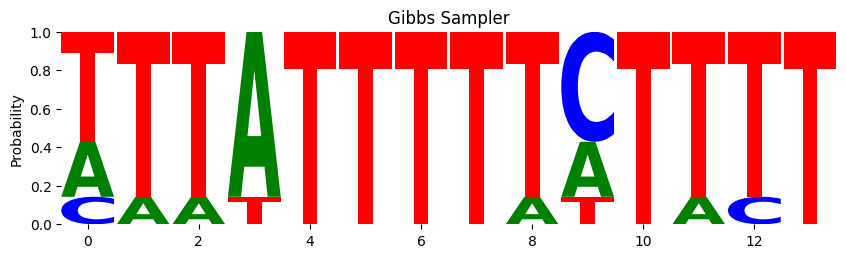

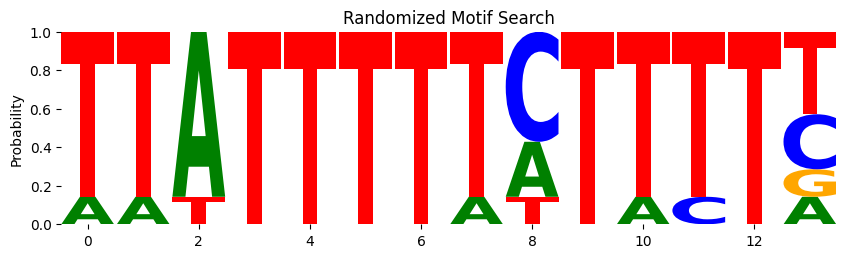

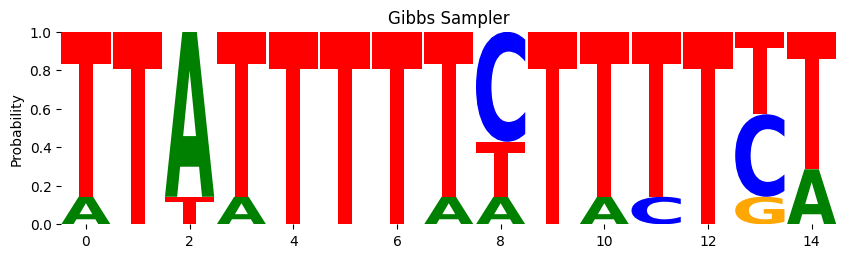

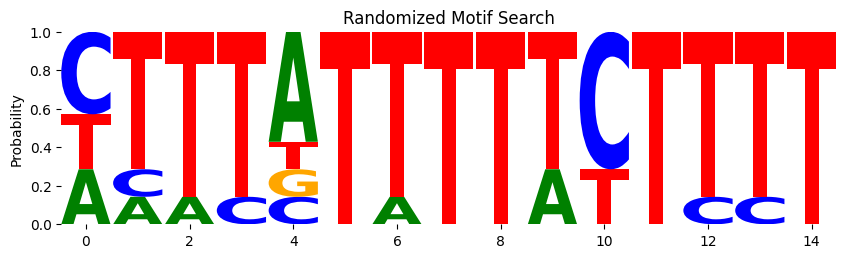

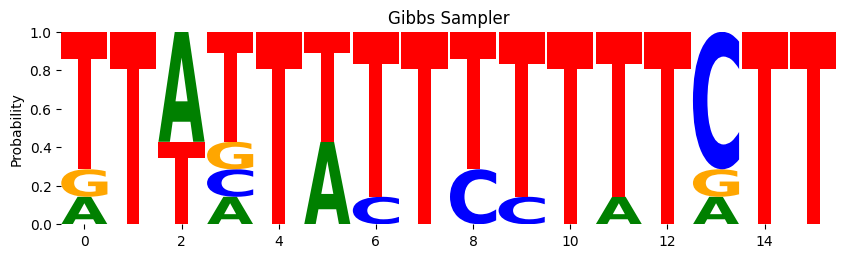

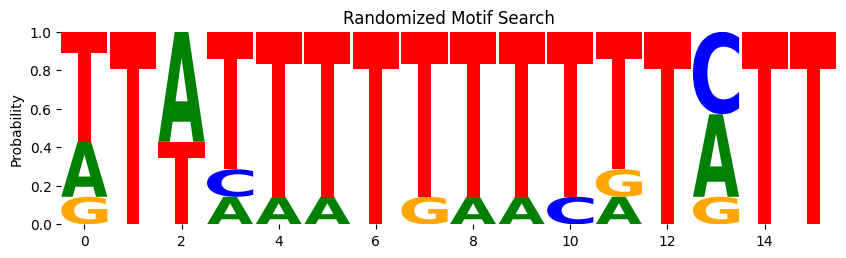

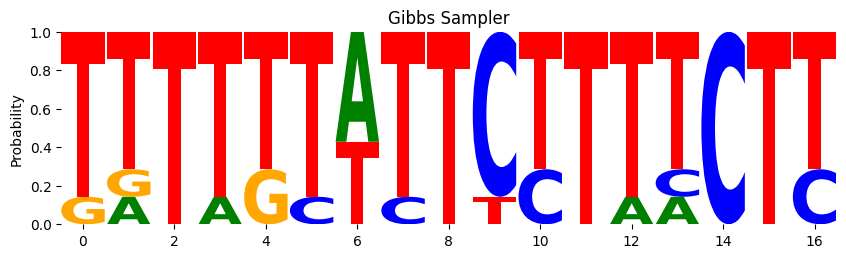

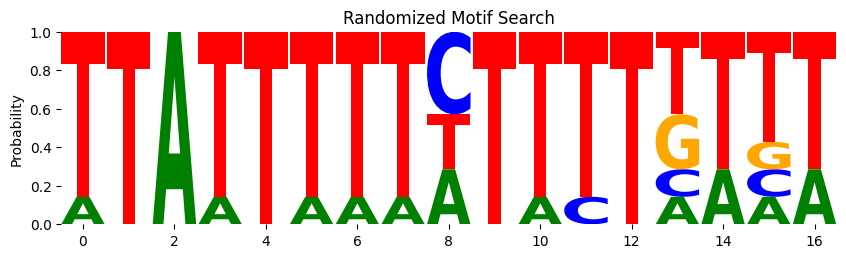

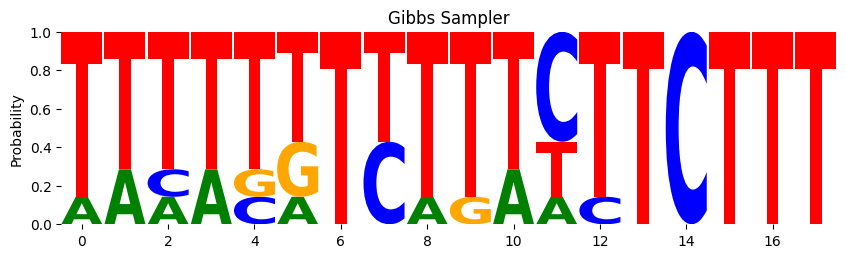

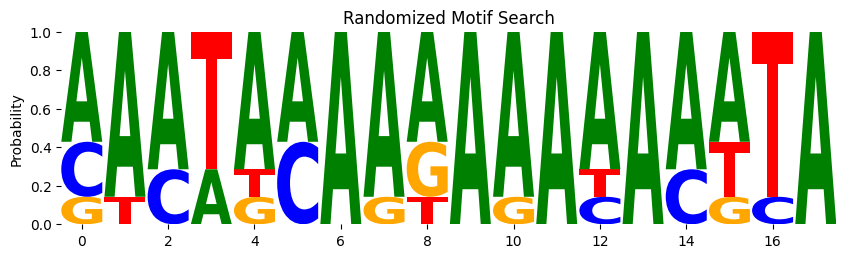

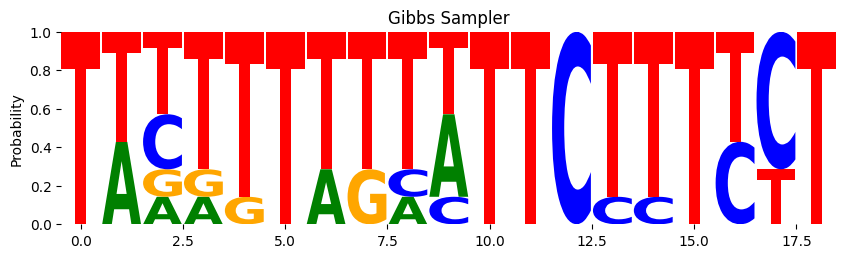

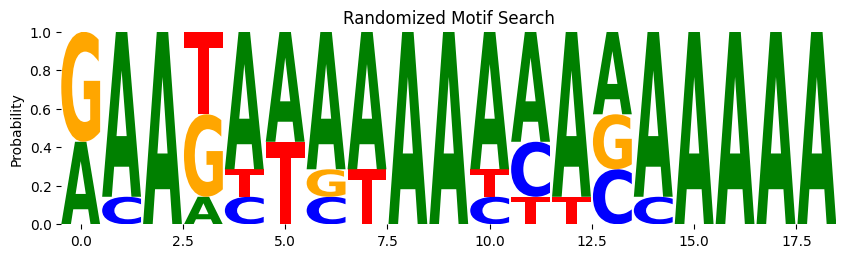

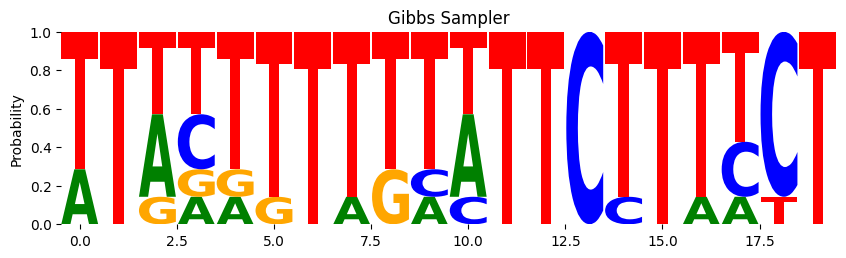

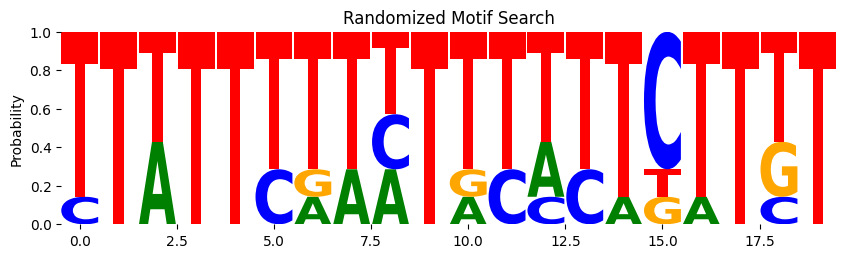

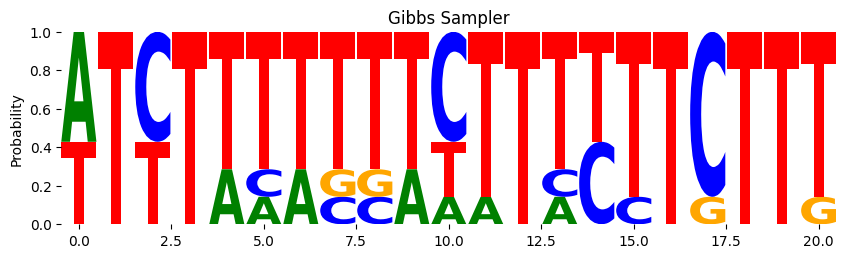

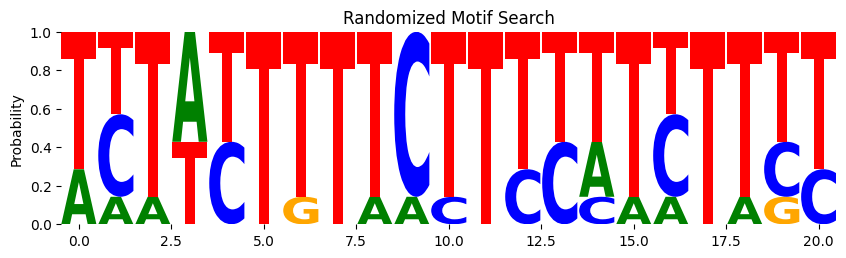

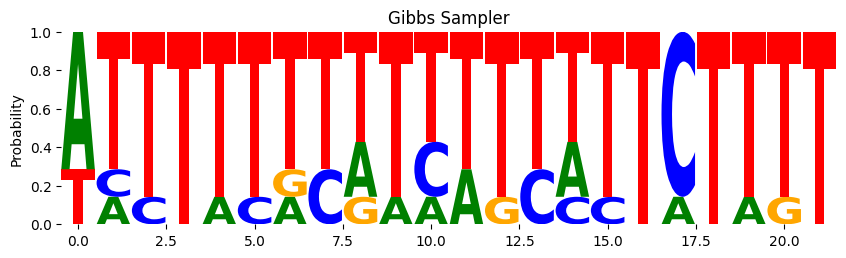

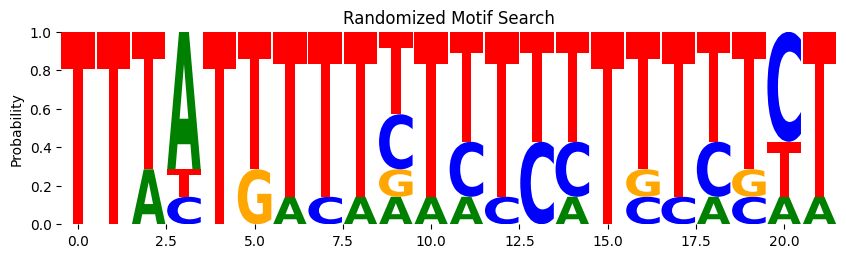

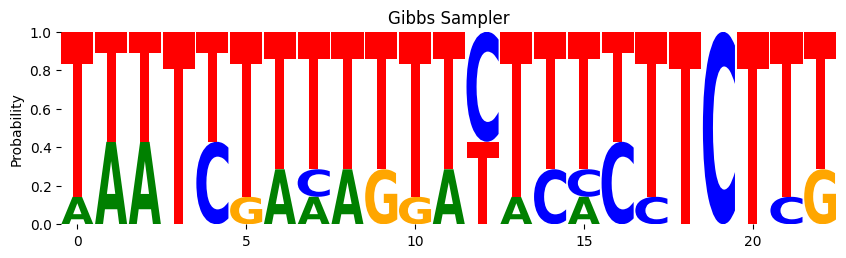

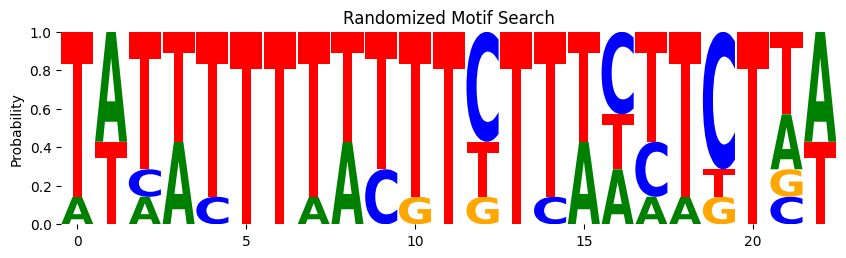

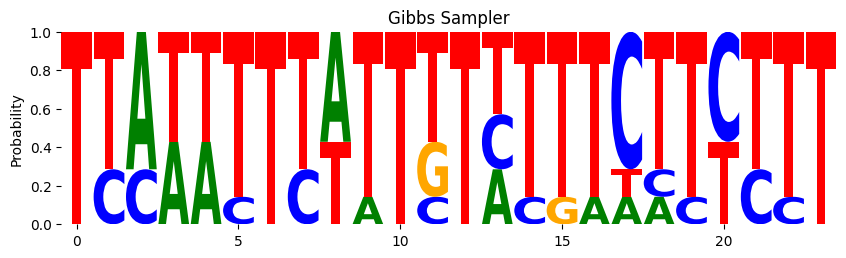

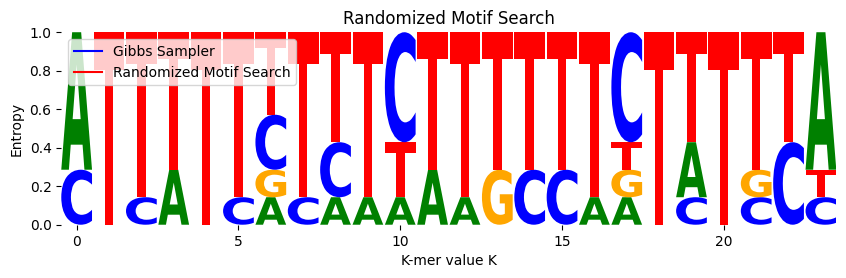

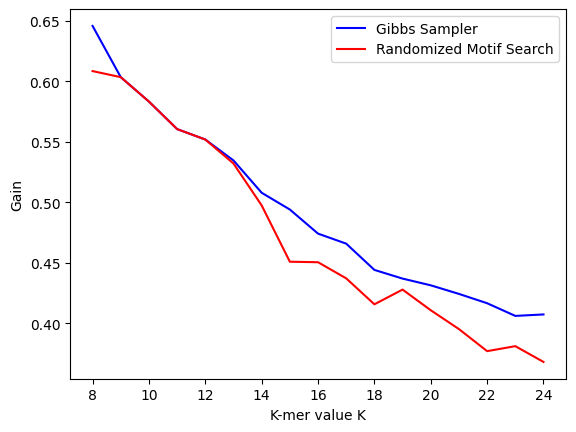

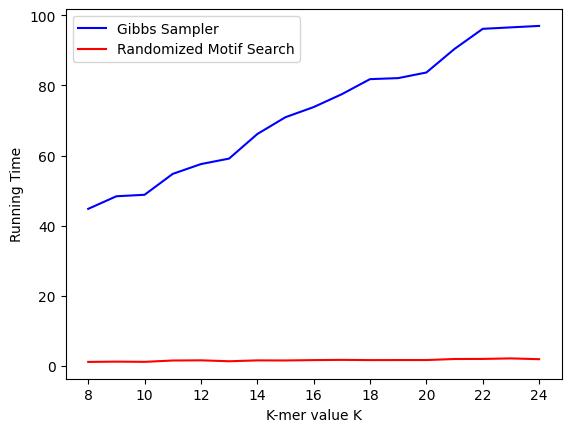

Best Motifs1:
Matrix of the motifs
ATTTTTTT
ATTTTTTT
ATTTTTTT
ATTTTTTT
ATTTATTT
ATTTTTTT
ATTTTTTT
Avg Entropy of the motifs:  1.3043011134736242
Avg Gain of the motifs:  0.6459109514411228
Score of the motifs:  1


     A  T
pos      
0    7  0
1    0  7
2    0  7
3    0  7
4    1  6
5    0  7
6    0  7
7    0  7
pos
0    7
1    7
2    7
3    7
4    7
5    7
6    7
7    7
dtype: int64
            A         T
pos                    
0    1.000000  0.000000
1    0.000000  1.000000
2    0.000000  1.000000
3    0.000000  1.000000
4    0.142857  0.857143
5    0.000000  1.000000
6    0.000000  1.000000
7    0.000000  1.000000
            A         T
pos                    
0    1.000000  0.000000
1    0.000000  1.000000
2    0.000000  1.000000
3    0.000000  1.000000
4    0.142857  0.857143
5    0.000000  1.000000
6    0.000000  1.000000
7    0.000000  1.000000
Best Motifs2:
Matrix of the motifs
TTTTCTTT
TTTTCTTT
TTTTTTTT
TTTTCTTT
TTTTGTTT
TTTTCTTT
TTTTTTTT
Avg Entropy of the motifs:  1.3416

/home/toriqe/.local/lib/python3.10/site-packages/logomaker/src/Logo.py:194: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=self.figsize)


Randomized Motif Search
Elasped time:  3.505682945251465  seconds
Matrix of the motifs
TTTATTTTACTTCTTTC
TTTATTTTTATTTTATT
TTTATTTTCATATTTCT
CTTATTTTTTTTTTGTT
TTTATTTCTTTCTTTTT
TCTATTTCGAACTTTTT
TTTTTTTTGATTTTTTT
TTTTTTTTTCCATTTTT
CTTTTTTCTATCTTTCA
TTTCTTTTTCTCTTTTT
TTTGTTTGTATTCTTTT
Avg Entropy of the motifs:  1.3836792507376467
Avg Gain of the motifs:  0.597146685491432
Score of the motifs:  37


     A  C  G   T
pos             
0    0  2  0   9
1    0  1  0  10
2    0  0  0  11
3    6  1  1   3
4    0  0  0  11
5    0  0  0  11
6    0  0  0  11
7    0  3  1   7
8    1  1  2   7
9    6  3  0   2
10   1  1  0   9
11   2  4  0   5
12   0  2  0   9
13   0  0  0  11
14   1  0  1   9
15   0  2  0   9
16   1  1  0   9
pos
0     11
1     11
2     11
3     11
4     11
5     11
6     11
7     11
8     11
9     11
10    11
11    11
12    11
13    11
14    11
15    11
16    11
dtype: int64
            A         C         G         T
pos                                        
0    0.000000  0.

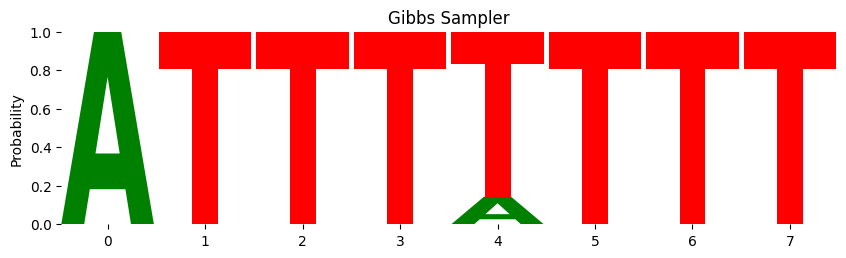

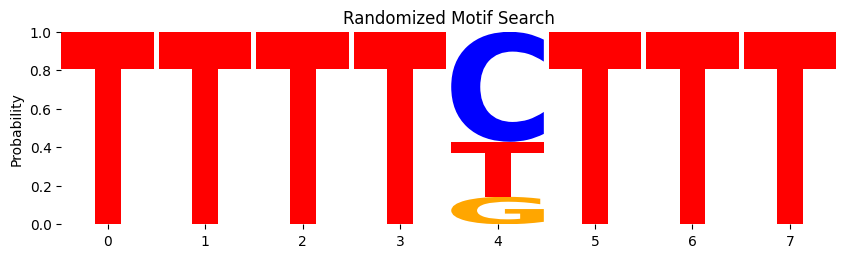

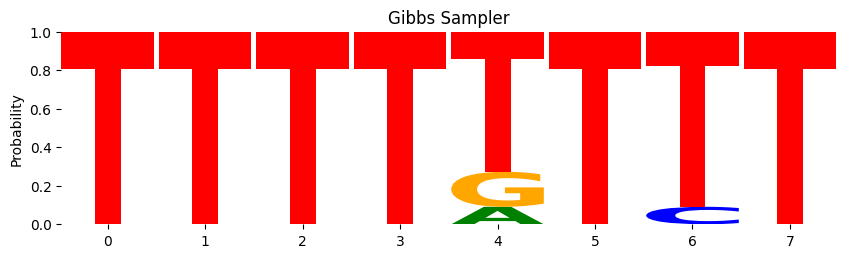

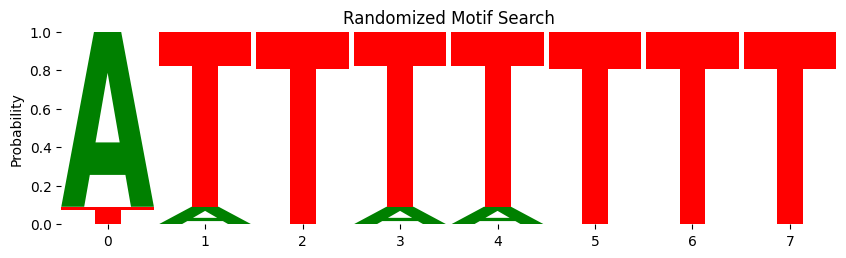

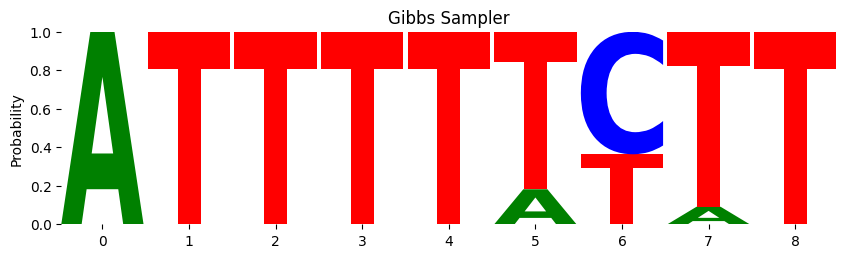

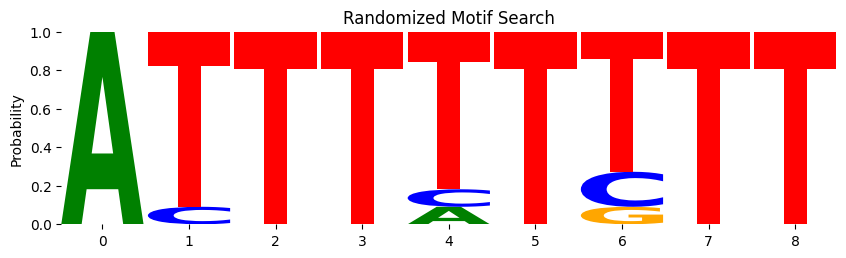

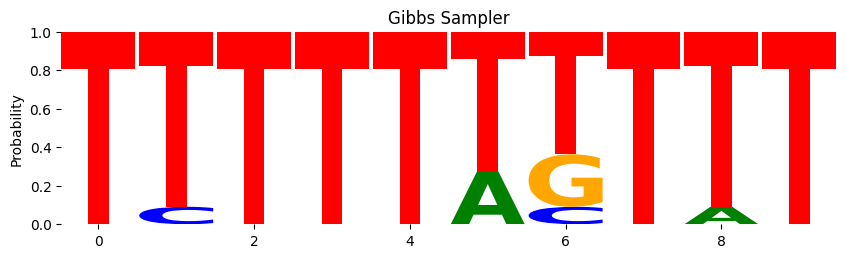

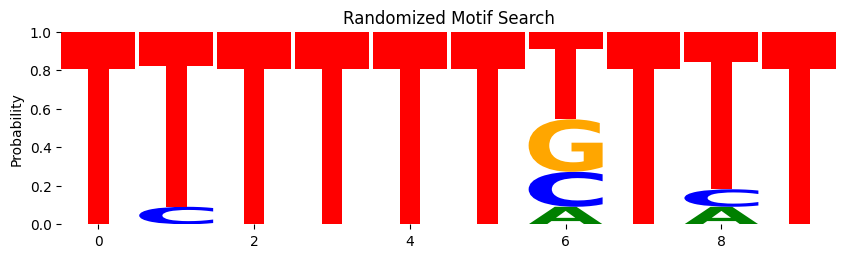

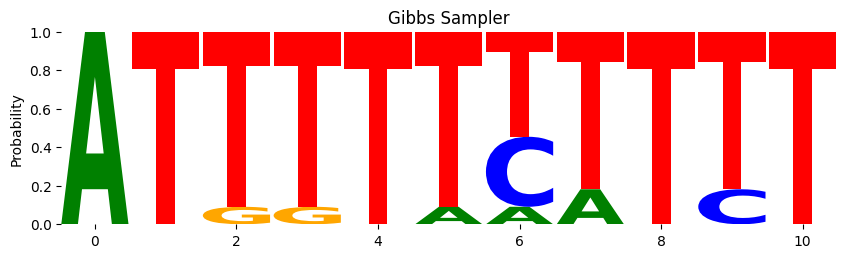

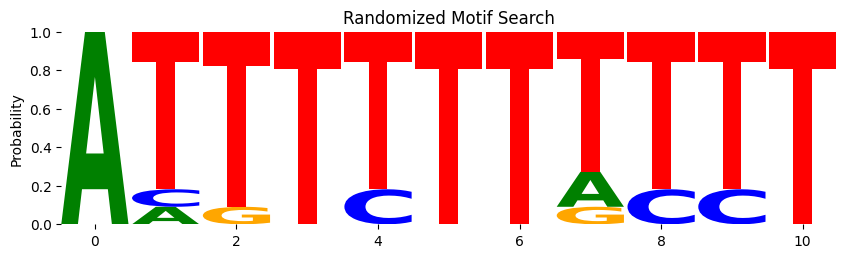

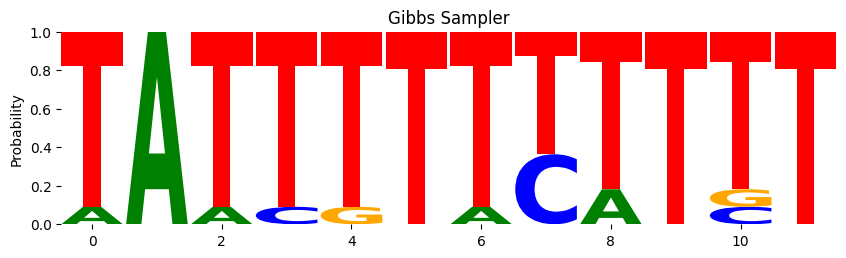

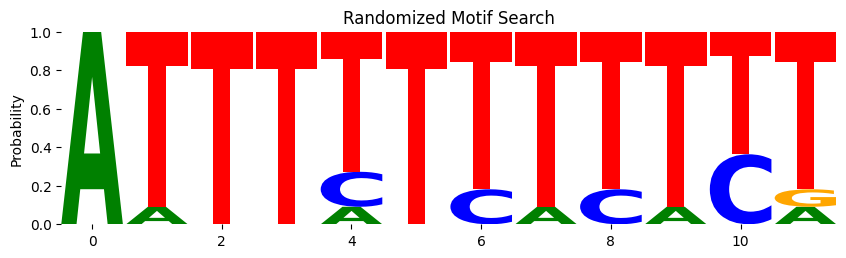

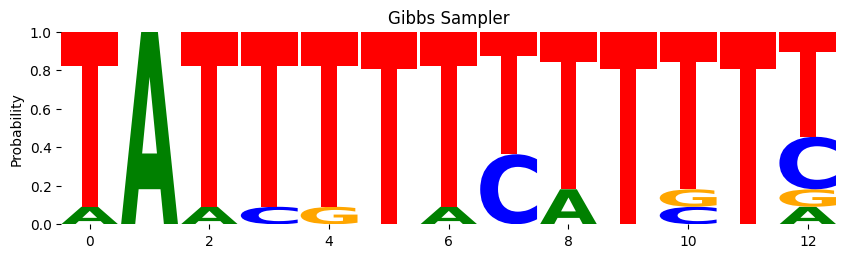

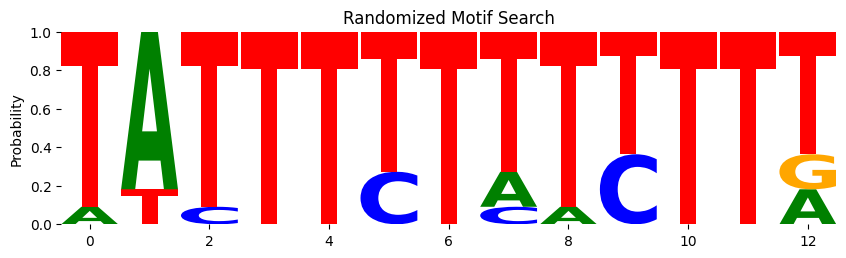

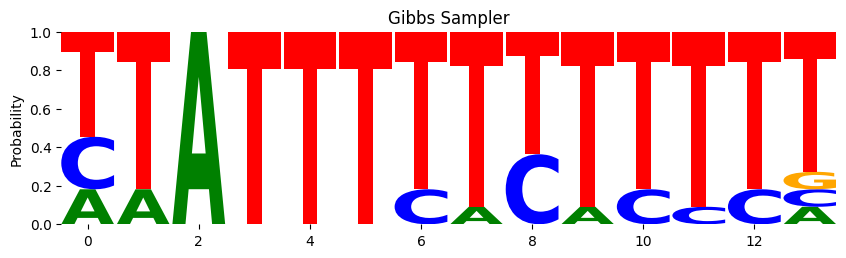

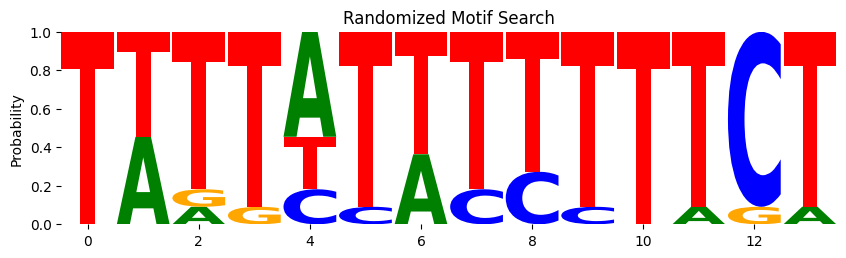

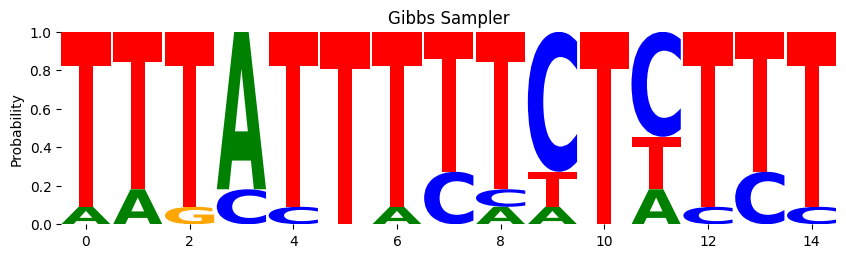

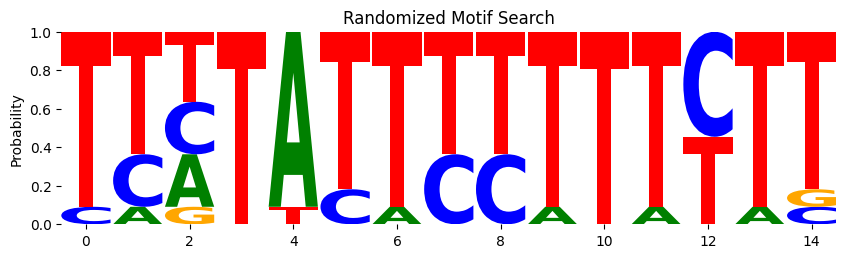

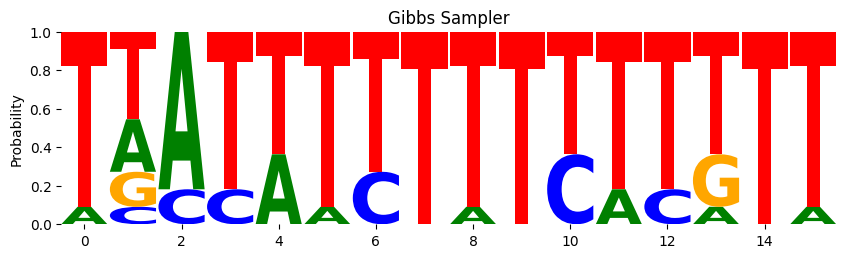

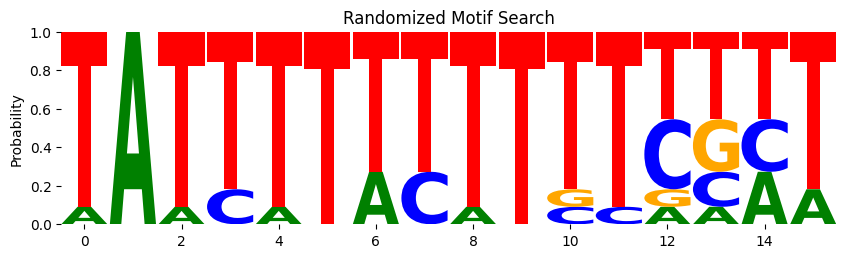

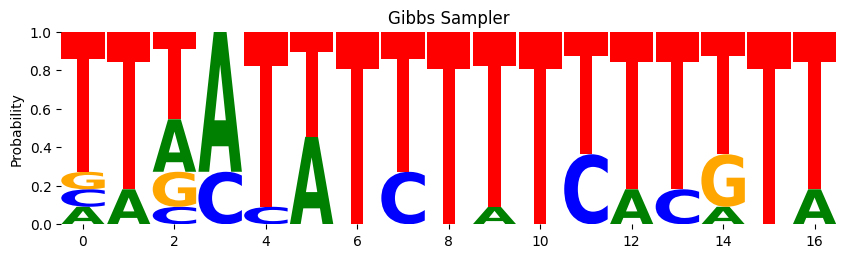

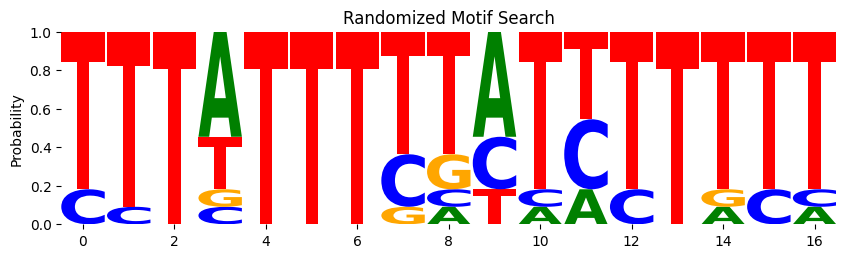

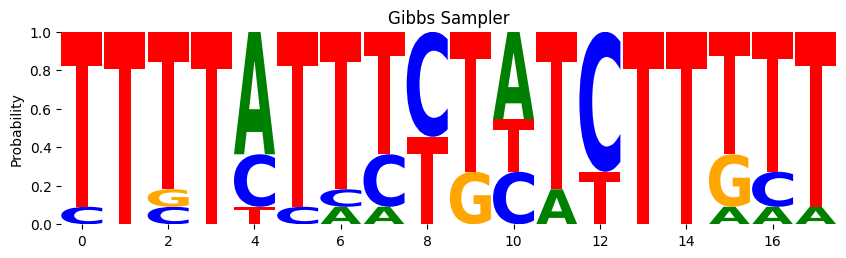

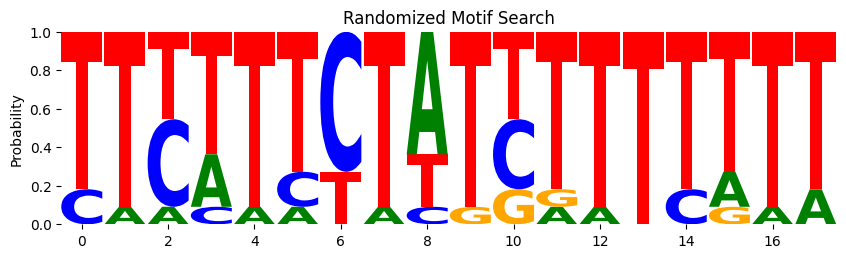

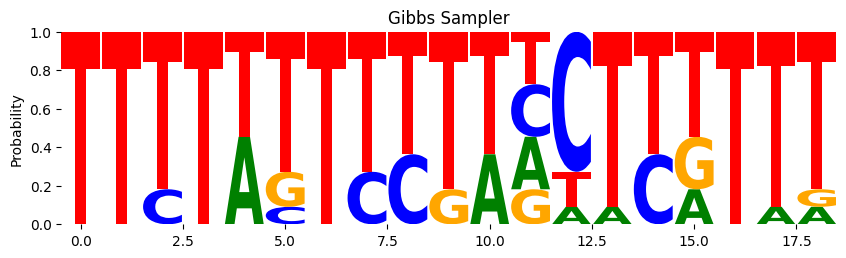

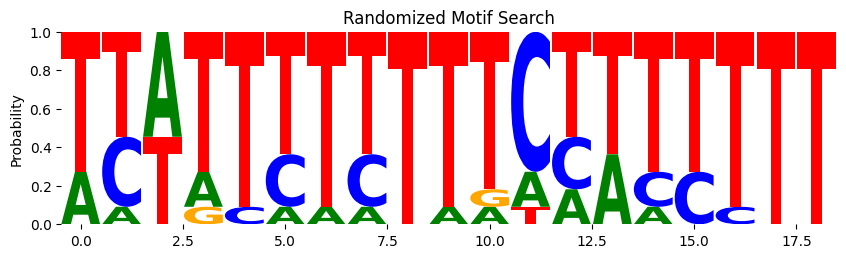

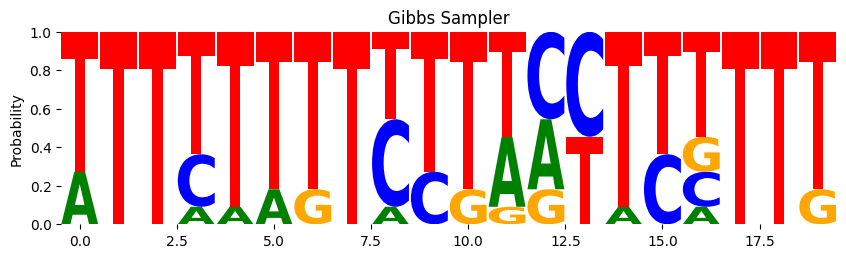

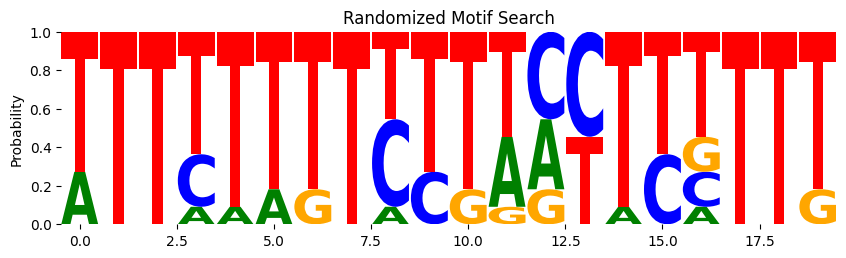

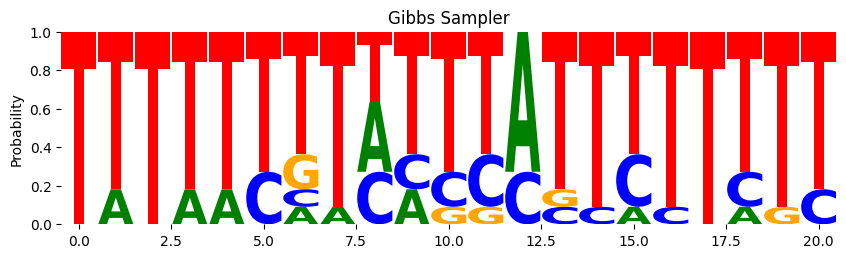

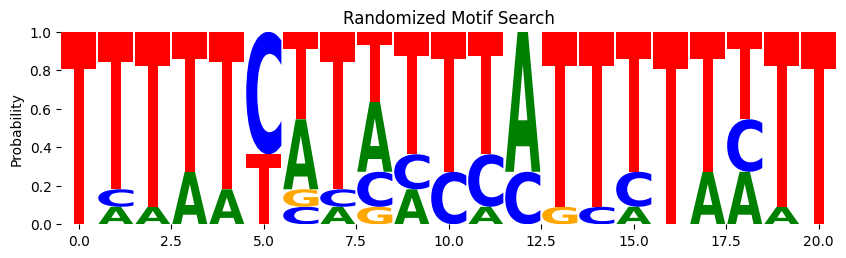

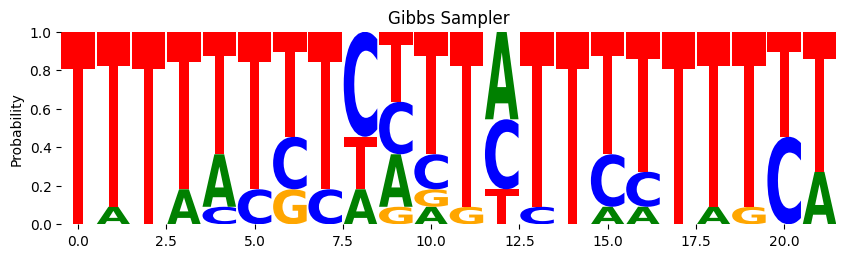

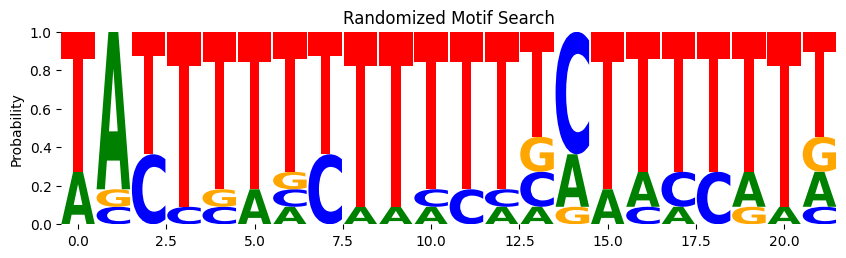

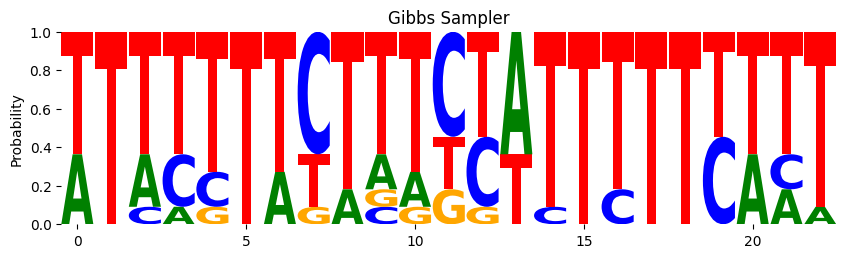

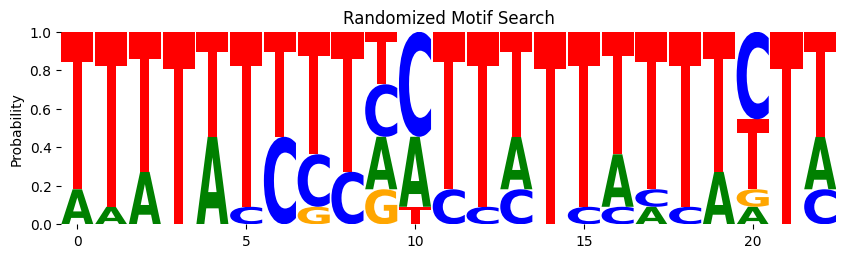

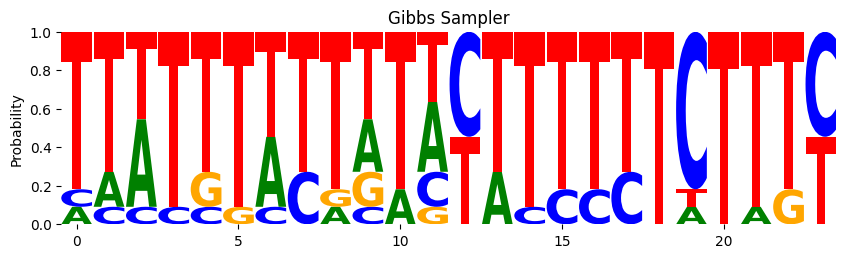

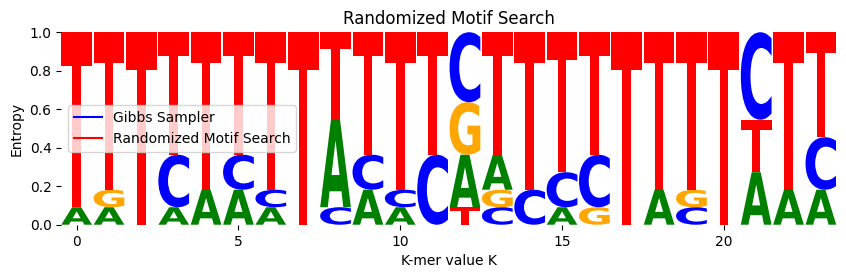

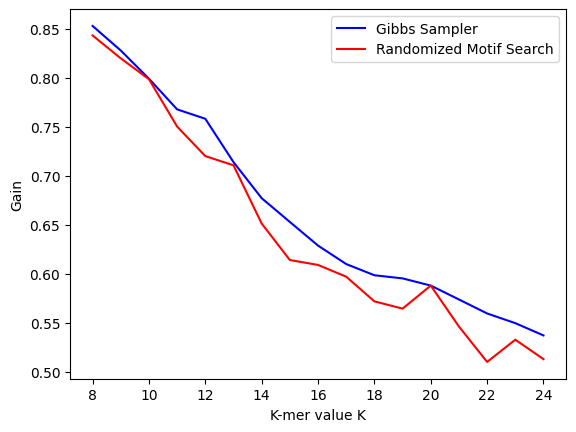

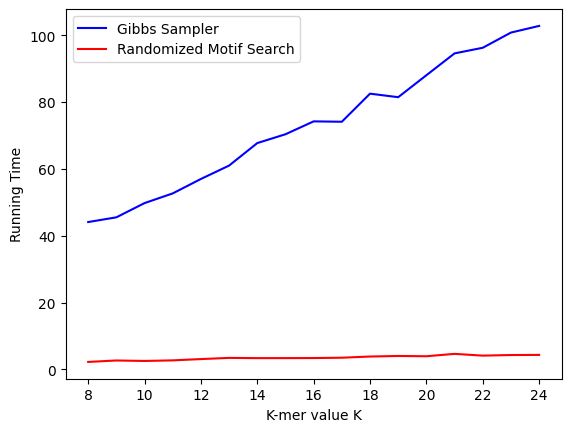

Best Motifs1:
Matrix of the motifs
TTTTGTTT
TTTTTTTT
TTTTTTTT
TTTTTTTT
TTTTTTTT
TTTTATTT
TTTTTTTT
TTTTTTTT
TTTTTTCT
TTTTTTTT
TTTTGTTT
Avg Entropy of the motifs:  1.128096759174537
Avg Gain of the motifs:  0.8527291770545415
Score of the motifs:  4


     A  C  G   T
pos             
0    0  0  0  11
1    0  0  0  11
2    0  0  0  11
3    0  0  0  11
4    1  0  2   8
5    0  0  0  11
6    0  1  0  10
7    0  0  0  11
pos
0    11
1    11
2    11
3    11
4    11
5    11
6    11
7    11
dtype: int64
            A         C         G         T
pos                                        
0    0.000000  0.000000  0.000000  1.000000
1    0.000000  0.000000  0.000000  1.000000
2    0.000000  0.000000  0.000000  1.000000
3    0.000000  0.000000  0.000000  1.000000
4    0.090909  0.000000  0.181818  0.727273
5    0.000000  0.000000  0.000000  1.000000
6    0.000000  0.090909  0.000000  0.909091
7    0.000000  0.000000  0.000000  1.000000
            A         C         G         T
pos            

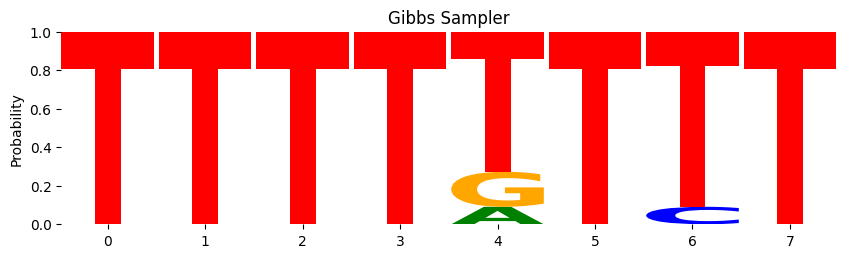

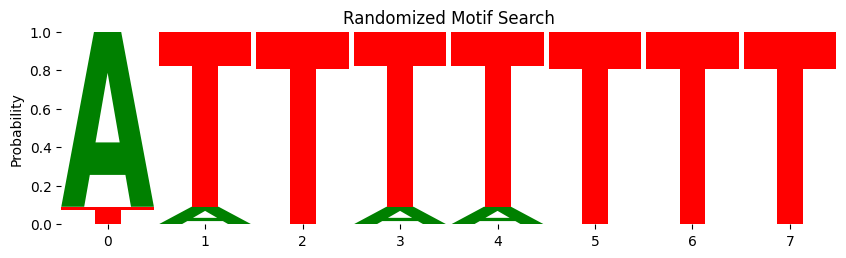

In [16]:
main()